CNN works best with image data. We all know that it has filters with which it convolve the input image to get the output. But how does the convolution work with the image data? Of the multiple Conv2D layers, how does the work of extracting features from the input image is seperated?
In this notebook, we will try to look into the CNN blackbox, to understand how the image is processed at each layer.

In [30]:
import os

# List files in the current directory to check if dogvscat.zip is here
os.listdir('/content')


['.config', 'dataset', 'dogvscat.zip', 'sample_data']

I have used the kaagle's dog vs cat dataset: link: https://www.kaggle.com/datasets/dhirensk/cats-vs-dogs-training8000test2000

In [5]:
import zipfile

zip_path = "/content/dogvscat.zip"  # Change this path if the file is elsewhere

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Check if extracted properly
os.listdir("/content/dataset")


['training_set', 'test_set', 'single_prediction']

In [31]:

import numpy as np
import tensorflow as tf  # For tf.data
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
import keras
import matplotlib.image as matim

In [32]:
BATCH_SIZE = 32
IMG_SIZE = (300, 300)
train_directory = "/content/dataset/training_set"
test_directory = "/content/dataset/test_set"
train_dataset = image_dataset_from_directory(train_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,

                                             seed=42)
validation_dataset = image_dataset_from_directory(test_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,

                                             seed=42)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [33]:
print("Train set batches",len(train_dataset))
print("Test set batches",len(validation_dataset))

Train set batches 250
Test set batches 63


In [34]:
iterator = iter(train_dataset)
images,labels = next(iterator)

One batch of images


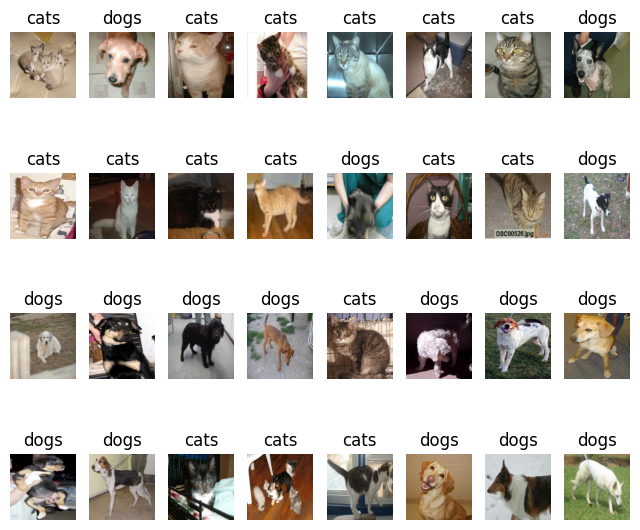

In [35]:
class_names = train_dataset.class_names
print("One batch of images")
plt.figure(figsize=(8, 7))


for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

We will build a custom model, with 4 convolution layers, and use this model to visualize how the conv layers work

In [36]:
normalizer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x,y: (normalizer(x),y) )
validation_dataset = validation_dataset.map(lambda x,y: (normalizer(x),y))

In [37]:
from keras import models
from keras import layers

In [89]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (300,300,3)))
model.add(layers.MaxPooling2D(2,2))


model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ="sigmoid"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 33, 33, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,019,073 (64.92 MB)

 Trainable params: 17,019,073 (64.92 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
from keras import optimizers

model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy']
  )
model.build(input_shape=(None, 300, 300, 3))

history1 = model.fit(
        train_dataset,
        epochs=10,
        validation_data=validation_dataset
  )

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 104ms/step - accuracy: 0.5007 - loss: 0.7876 - val_accuracy: 0.5735 - val_loss: 0.6823
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.5919 - loss: 0.6712 - val_accuracy: 0.6595 - val_loss: 0.6227
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.7001 - loss: 0.5829 - val_accuracy: 0.7405 - val_loss: 0.5308
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.7644 - loss: 0.4869 - val_accuracy: 0.7655 - val_loss: 0.5014
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.8258 - loss: 0.3890 - val_accuracy: 0.7565 - val_loss: 0.6034
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.8762 - loss: 0.2785 - val_accuracy: 0.7480 - val_loss: 0.6951
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 104ms/step - accuracy: 0.9350 - loss: 0.1689 - val_accuracy: 0.7575 - val_loss: 0.9636
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.9631 - loss: 0.

In [92]:
# Summarize filters in each convolutional layer
conv_layers = []

# Summarize filter shapes
for layer in model.layers:
    # Check for convolutional layer
    if 'conv' not in layer.name :
      continue
    # Get filter weights


    conv_layers.append(layer.name)
    filters, biases = layer.get_weights()

    print(layer.name, filters.shape)

conv2d_12 (3, 3, 3, 32)
conv2d_13 (3, 3, 32, 64)
conv2d_14 (3, 3, 64, 128)
conv2d_15 (3, 3, 128, 128)


In [95]:
model.layers

[<Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_12, built=True>,
 <Conv2D name=conv2d_13, built=True>,
 <MaxPooling2D name=max_pooling2d_13, built=True>,
 <Conv2D name=conv2d_14, built=True>,
 <MaxPooling2D name=max_pooling2d_14, built=True>,
 <Conv2D name=conv2d_15, built=True>,
 <MaxPooling2D name=max_pooling2d_15, built=True>,
 <Flatten name=flatten_3, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>]

In [98]:
weights = {}
conv_layers = []
ix = 0
for layer in model.layers:
  if 'conv' in layer.name:
    conv_layers.append(layer)
    filters, biases = model.layers[ix].get_weights()
    weights[layer] = [filters, biases]
    ix = ix+2
    print(layer.name,":",filters.shape)

conv2d_12 : (3, 3, 3, 32)
conv2d_13 : (3, 3, 32, 64)
conv2d_14 : (3, 3, 64, 128)
conv2d_15 : (3, 3, 128, 128)


In [99]:
print(conv_layers)

[<Conv2D name=conv2d_12, built=True>, <Conv2D name=conv2d_13, built=True>, <Conv2D name=conv2d_14, built=True>, <Conv2D name=conv2d_15, built=True>]


In [100]:
for layer in conv_layers:
  f_min, f_max = weights[layer][0].min() , weights[layer][0].max()
  weights[layer][0] = (weights[layer][0] - f_min)/ (f_max - f_min)

In this segment, we will look at 3 filters from each convolution layer and visualize it

conv2d_12


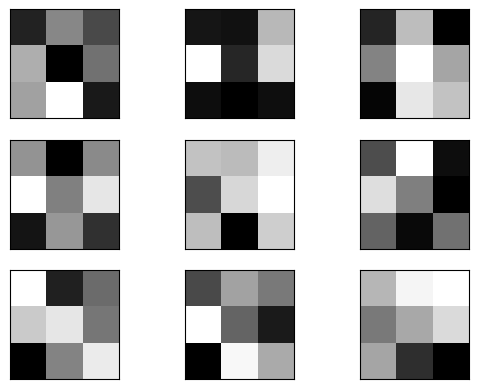

conv2d_13


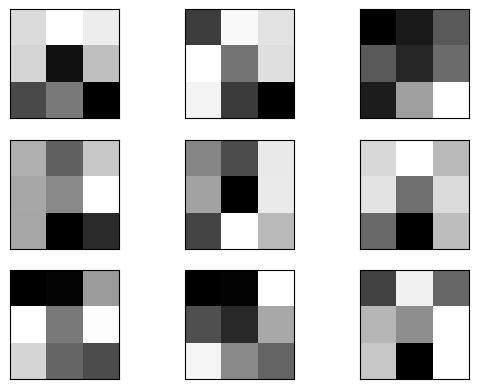

conv2d_14


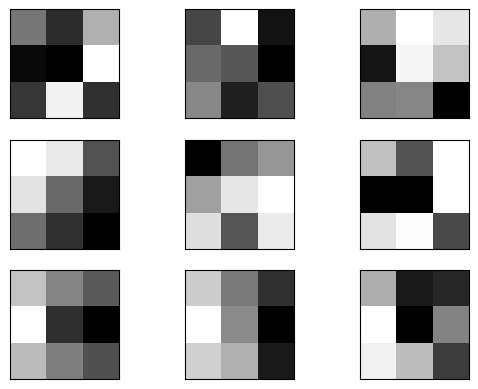

conv2d_15


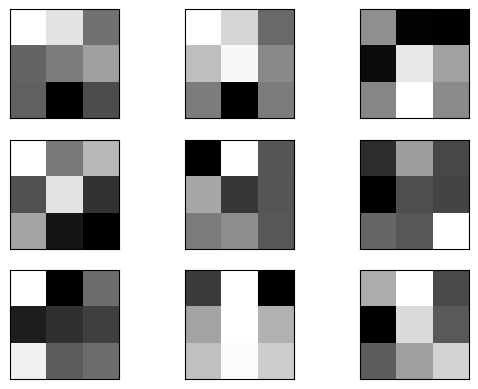

In [102]:
for layer in conv_layers:
  print(layer.name)
  filters =weights[layer][0]
  n_filters, ix = 3, 1
  for i in range(n_filters):
    # Get the filter
    f = filters[:, :, :, i]
    # Plot each channel separately
    for j in range(3):
      # Specify subplot and turn of axis
      ax = pyplot.subplot(n_filters, 3, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # Plot filter channel in grayscale
      pyplot.imshow(f[:, :, j], cmap='gray')
      ix += 1
  # Show the figure
  pyplot.show()


In [103]:

# Summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# Check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# Summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_12 (None, 298, 298, 32)
2 conv2d_13 (None, 147, 147, 64)
4 conv2d_14 (None, 71, 71, 128)
6 conv2d_15 (None, 33, 33, 128)


helper method to plot the feature maps

In [86]:
from matplotlib import pyplot as plt
import numpy as np
def visualize_featuremaps(feature_maps ):
  # Number of filters in feature_maps
  num_filters = feature_maps.shape[-1]  # Extract total filters (e.g., 32)

  # Define grid size dynamically
  grid_size = int(np.ceil(np.sqrt(num_filters)))

  fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))

  ix = 0  # Start index
  for i in range(grid_size):
      for j in range(grid_size):
          if ix < num_filters:
              ax = axes[i, j]
              ax.set_xticks([])
              ax.set_yticks([])
              ax.imshow(feature_maps[0, :, :, ix], cmap='gray')
              ax.set_title(f"Filter {ix+1}")
              ix += 1
          else:
              axes[i, j].axis('off')  # Hide empty subplots

  plt.tight_layout()
  plt.show()


Loading and preprocessing the test image, to feed to the model

In [78]:
# Load the image with the required shape
img = tf.keras.utils.load_img('/content/dataset/single_prediction/cat_or_dog_1.jpg', target_size=(300, 300))

# The image PIL object needs to be converted to a NumPy array of pixel data
# and expanded from a 3D array to a 4D array with the dimensions of
# [samples, rows, cols, channels], where we only have one sample.

# Convert the image to an array
img = tf.keras.utils.img_to_array(img)

# Expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

# Prepare the image (e.g. scale pixel values for the vgg)
img = normalizer(img)

conv2d_12 's convolution outputs
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_234']
Received: inputs=Tensor(shape=(1, 300, 300, 3))
  warnings.warn(msg)


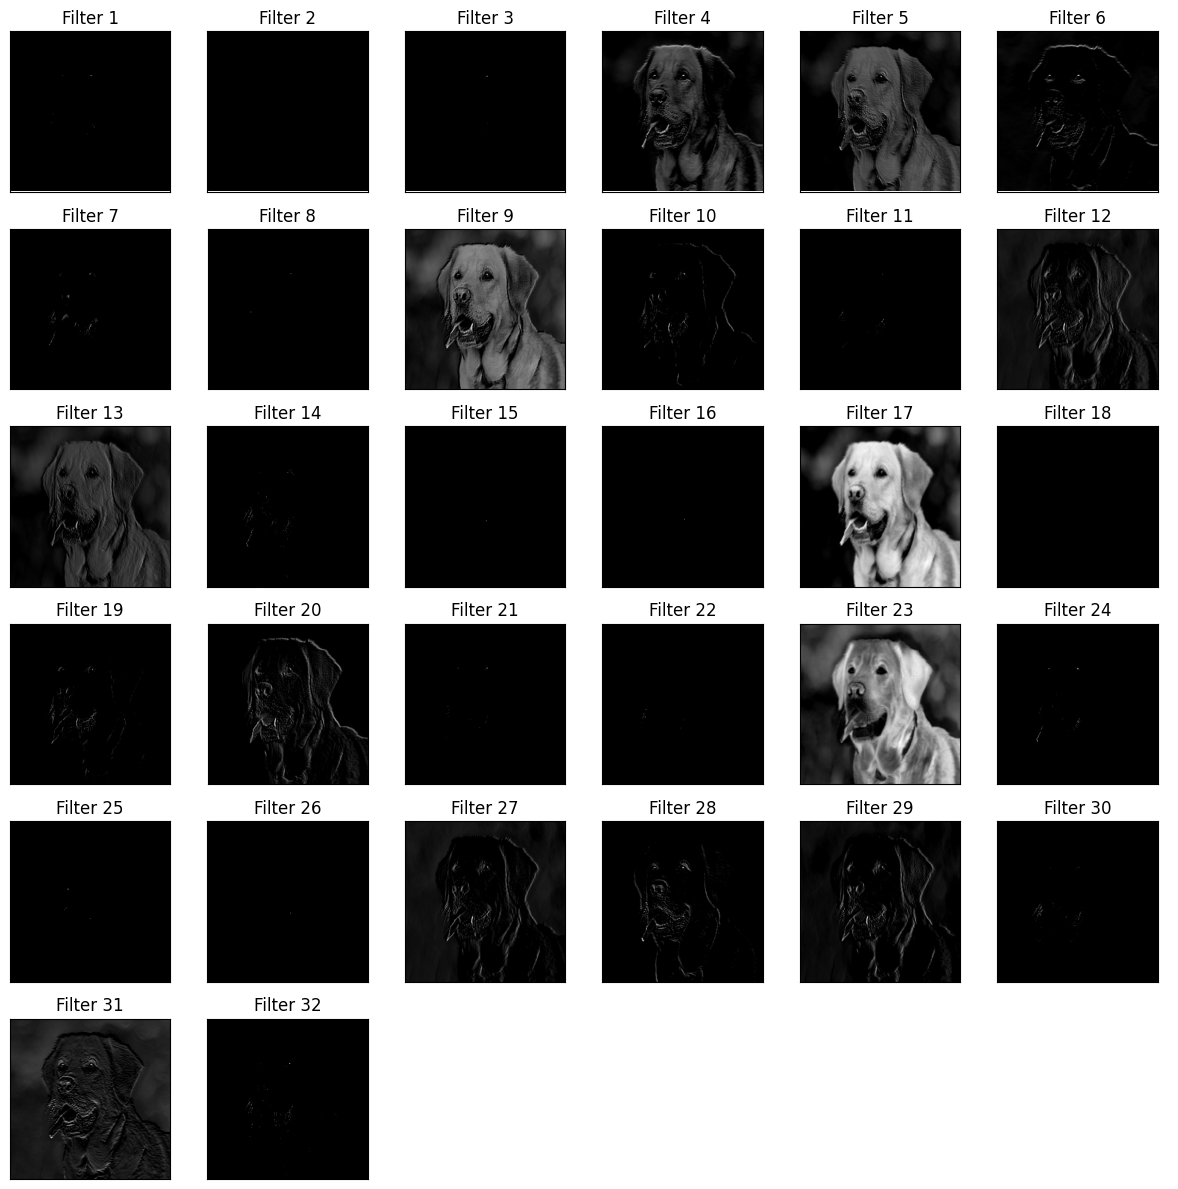

conv2d_13 's convolution outputs
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


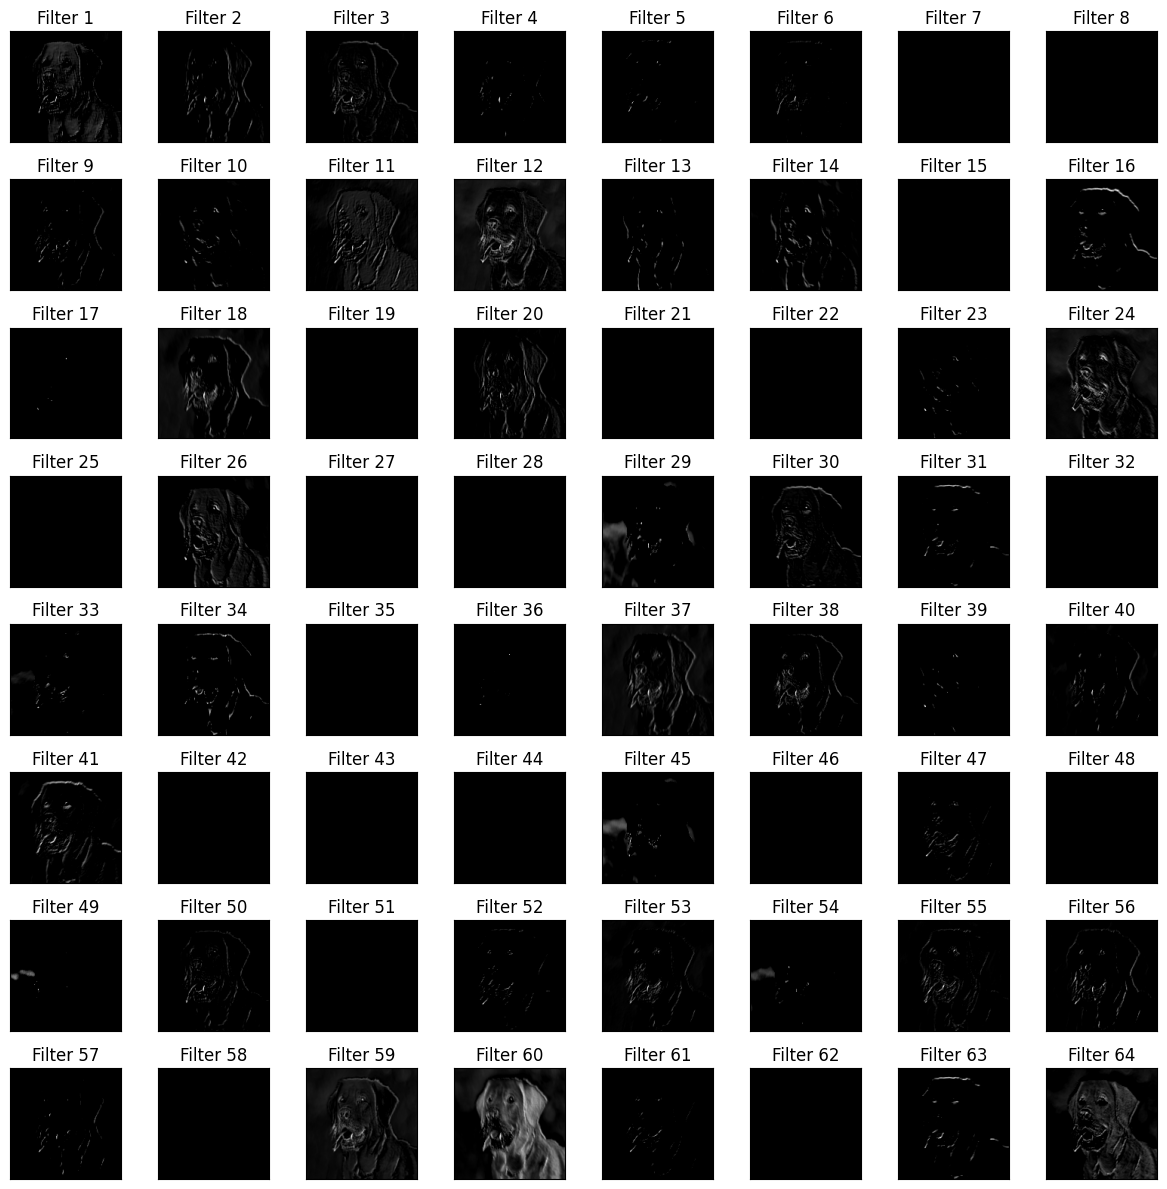

conv2d_14 's convolution outputs


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


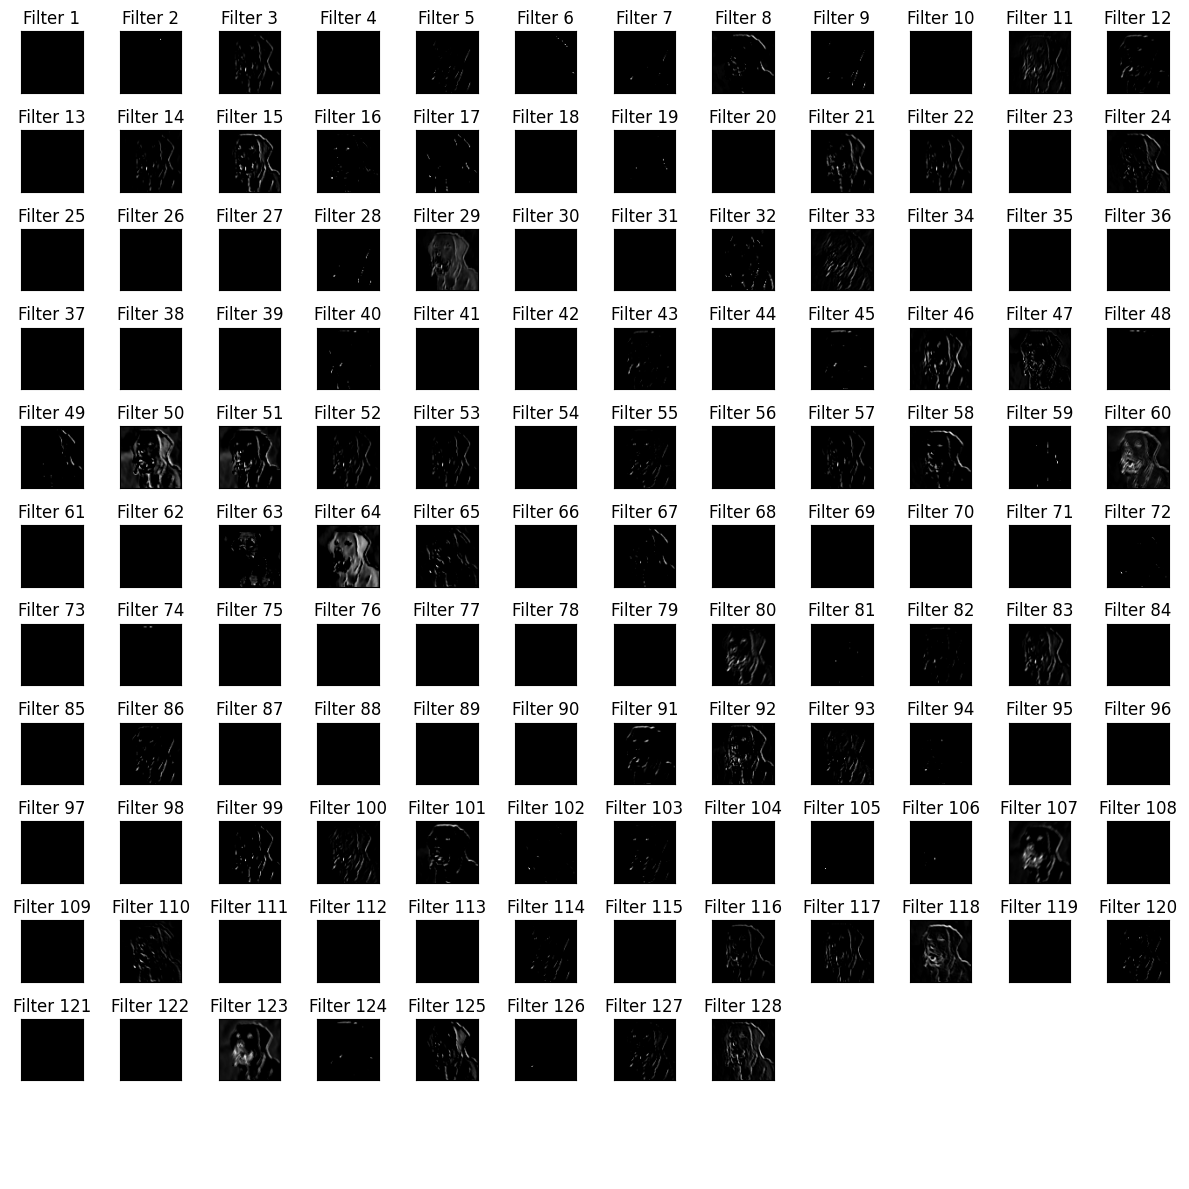

conv2d_15 's convolution outputs


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


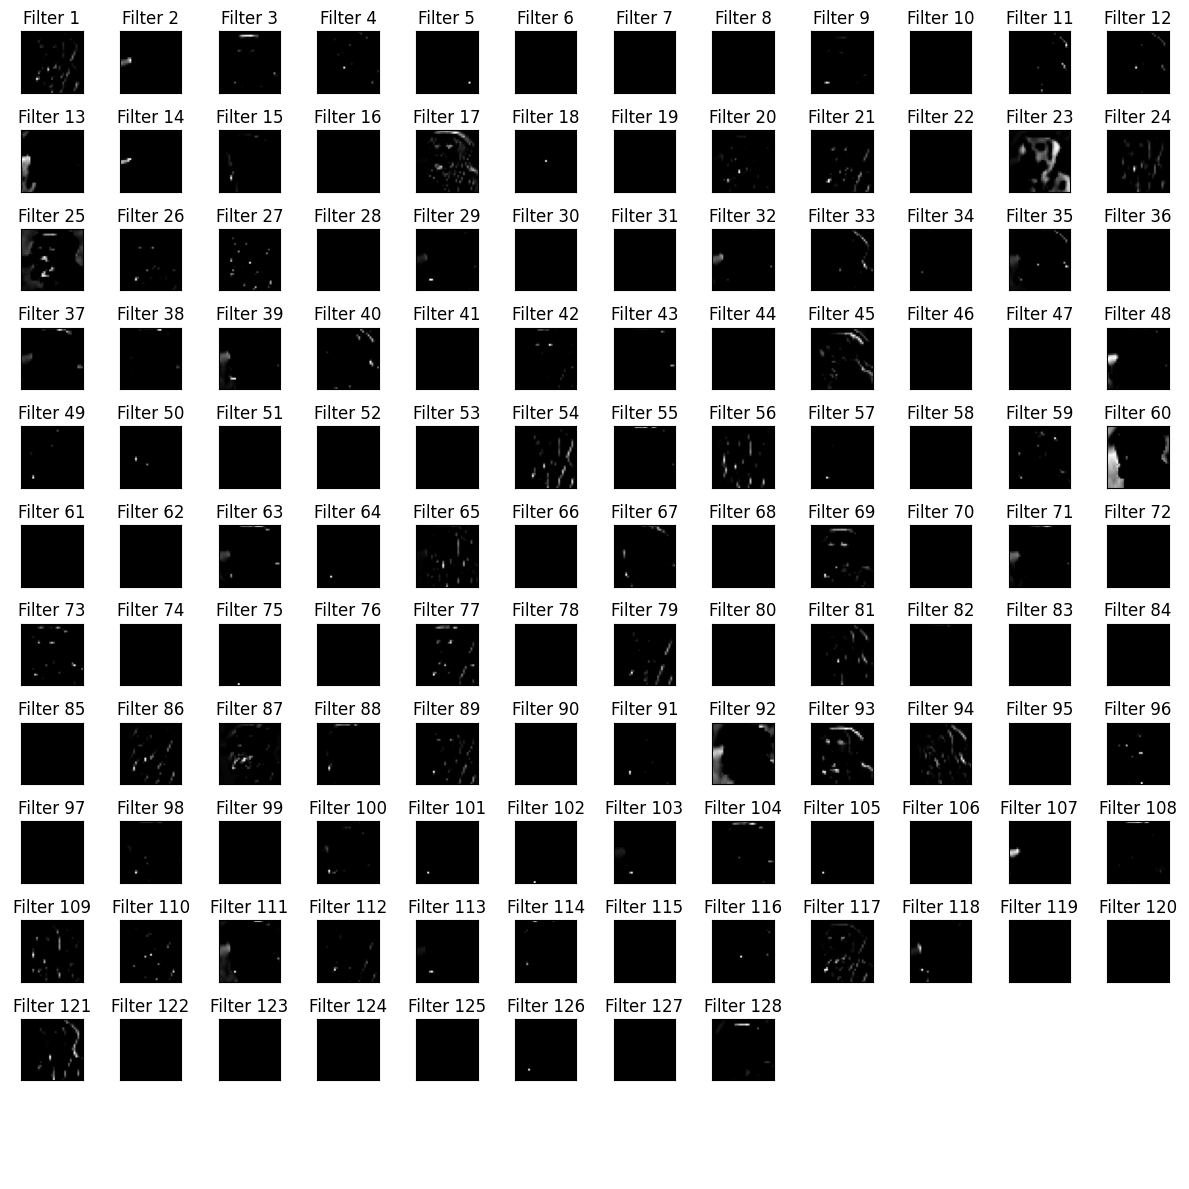

In [104]:
activation_models = {}
for layer in conv_layers:
  print(layer.name,"'s convolution outputs")
  activation_models[f"model_op_{layer.name}"] = tf.keras.models.Model(inputs=model.inputs, outputs=layer.output)
  feature_maps = activation_models[f"model_op_{layer.name}"].predict(img)
  visualize_featuremaps(feature_maps)